## Secant Method
- Implement the <b>Secant method</b> as a function and solve the following equation:
    - $𝒇(𝒙)=𝒙^𝟑−𝒙^𝟐−𝟏𝟓𝒙+𝟏$,          𝒙_𝟎=𝟒.𝟓
- Draw the functions and check out the roots.
- Try your function with different initialization and check out the results.
- Compare the results with the one from Newton's method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = lambda x:pow(x,3) - pow(x,2) - 15*x + 1

In [3]:
def secant_method(f,xk,x_0,tol,iterations):
    for i in range (iterations):
        xk1 = xk - f(xk)*((xk - x_0)/(f(xk)-f(x_0)))
        #print(xk1)
        x_0 = xk
        xk = xk1
        if abs(f(xk1)) <= tol:
            print("Found solution after ",i+1, " iterations")
            print("r = ", xk1)
            print("f(r1) = ", f(xk1))
            break


In [4]:
f_d = lambda x:3*pow(x,2) - 2*x - 15 

In [5]:
def newtons(f,xk,x_0,tol,iterations):
    for i in range (iterations):
        xk1 = xk - f(xk)/f_d(xk)
        #print(xk1)
        x_0 = xk
        xk = xk1
        if abs(f(xk1)) <= tol:
            print("Found solution after ",i+1, " iterations")
            print("r = ", xk1)
            print("f(r1) = ", f(xk1))
            break

In [6]:
# Secant with initial xk-1 = 5.5, epsilon = 1e-8
secant_method(f, 4.5, 5.5, 1e-8, 1000)

Found solution after  5  iterations
r =  4.375753855672038
f(r1) =  3.097966327914037e-12


In [7]:
# Newton's with epsilon = 1e-8
newtons(f, 4.5, 5.5, 1e-8, 1000)

Found solution after  3  iterations
r =  4.375753855705814
f(r1) =  1.1410321576477145e-09


In [8]:
# Secant with initial xk-1 = 4.51, epsilon = 1e-8
secant_method(f, 4.5, 4.51, 1e-8, 1000)

Found solution after  4  iterations
r =  4.3757538557143265
f(r1) =  1.427807205800491e-09


In [9]:
# Secant with initial xk-1 = 0, epsilon = 1e-8
secant_method(f, 4.5, 0, 1e-8, 1000)

Found solution after  10  iterations
r =  -3.4421461699322515
f(r1) =  -2.842170943040401e-14


## Newton's Method Optimization
### Single Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐−𝟏𝟓𝒙+𝟏$,        
- Draw the functions and check out the minimum.
- Draw the 1st derivative of the function and check out the root.
- Draw 2nd derivative of the function and check out the sign at the minimum.
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.

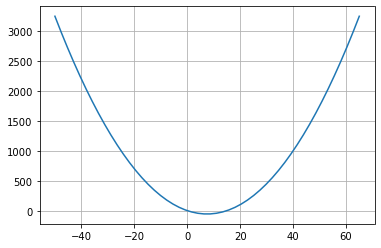

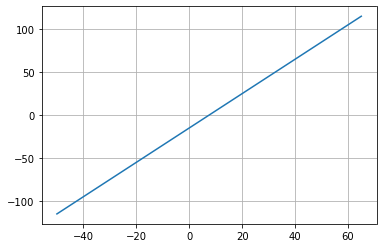

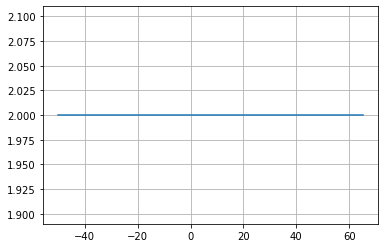

In [125]:
x = np.linspace(-50, 65)
f_x = x ** 2 - 15 * x + 1
fd_x = 2 * x - 15
fdd_x = np.full((np.linspace(-50, 65).shape[0],), 2)

plt.figure(1)
plt.plot(x, f_x)
plt.grid(visible = True)
plt.figure(2)
plt.plot(x, fd_x)
plt.grid(visible = True)
plt.figure(3)
plt.plot(x, fdd_x)
plt.grid(visible = True)
plt.show()

In [11]:
f = lambda x: x**2 - 15*x +1
Df = lambda x: 2*x -15
DDf = lambda x: 2

In [12]:
def gradient_descent(xk, alpha, epsilon, iterations = 1000):
    for i in range(iterations):
        xk = xk - alpha*Df(xk)
        if abs(Df(xk)) <= epsilon:
            print('Found solution after ', i+1, ' iterations.')
            print('(',xk,', ',Df(xk),')')
            break

In [13]:
def Newtons_Opt_singleVar(xk,alpha, epsilon, iterations = 1000):
    for i in range(iterations):
        xk = xk - (alpha*(Df(xk)/DDf(xk)))
        if abs(Df(xk)) <= epsilon:
            print('Found solution after ', i+1, ' iterations.')
            print('(',xk,', ',Df(xk),')')
            break
    

In [14]:
# Gradient descent with learning rate = 0.01, x0=40, epsilon = 0.1
gradient_descent(40,0.01,0.1)

Found solution after  321  iterations.
( 7.549596800192111 ,  0.09919360038422198 )


In [15]:
# Newton's method without learning rate, x0=40, epsilon = 0.1
Newtons_Opt_singleVar(40,1,0.1)

Found solution after  1  iterations.
( 7.5 ,  0.0 )


In [16]:
# Newton's method with learning rate = 0.8, x0=40, epsilon = 0.1
Newtons_Opt_singleVar(40,0.8,0.1)

Found solution after  5  iterations.
( 7.5104 ,  0.020799999999999486 )


### Multi Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.

In [17]:
from sympy import *
from sympy.plotting import plot3d

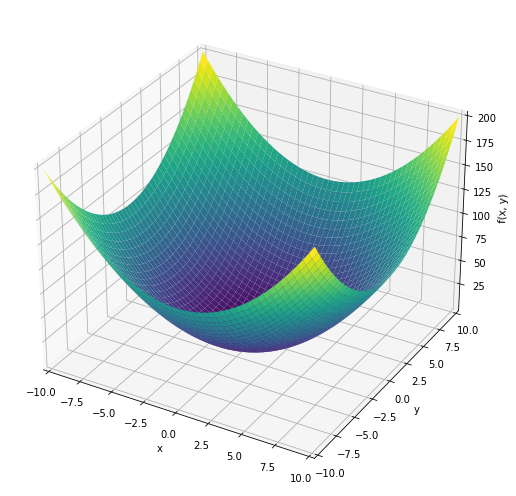

In [18]:
x,y = symbols('x y')
f = x**2 + y**2
plot3d(f,size=(10,7))

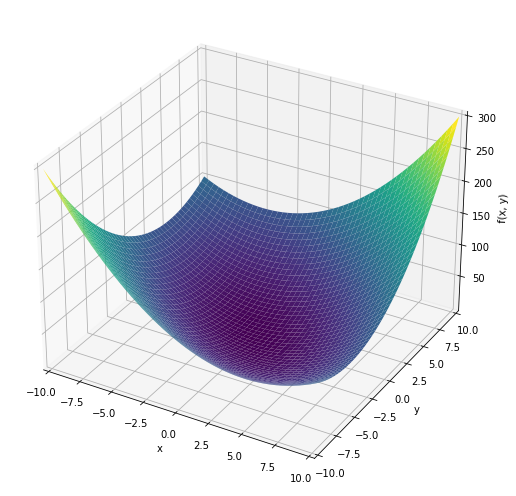

In [19]:
x,y = symbols('x y')
f = x**2 + x * y + y**2
plot3d(f,size=(10,7))

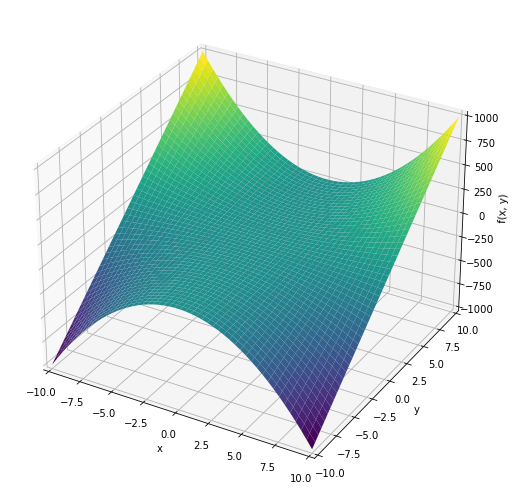

In [19]:
x,y = symbols('x y')
f = x**2 * y
plot3d(f,size=(10,7))

In [137]:
from numpy.linalg import inv, norm

In [182]:
f = lambda x,y : pow(x,2) + pow(y,2)
Df = lambda x : np.array([ 2*x[0],2*x[1] ])
DDf_1 = np.array([[2,0],[0,2]])
f2 = lambda x,y: pow(x,2)+x*y+pow(y,2)
Df2 = lambda x: np.array([2*x[0]+x[1],2*x[1]+x[0]])
DDf_2 = np.array([[2,1],[1,2]])
f3 = lambda x,y: pow(x,2)*y
Df3 = lambda x: np.array([[(2* x[0][0]) * x[1][0]], [(x[0][0])**2]])
DDf_3 = lambda x: np.array([[(2 * x[1][0]), (2*x[0][0])], [(2*x[0][0]), 0]])

In [150]:
def multivar_Newton(Df,DDf,xk, alpha, epsilon, iterations = 1000):
    for i in range(iterations):
        xk = xk - (inv(DDf)@(alpha*Df(xk)))
        if norm(Df(xk)) <= epsilon:
            print('Found solution after ', i+1, ' iterations.')
            print('(',xk,', ',Df(xk),')')
            break

In [140]:
#Df = lambda x : np.array([ 2*x[0],2*x[1] ])
def multivar_gradient_descent(Df, DDf_1,xk, alpha, epsilon, iterations = 1000):
    for i in range(iterations):
        xk = xk - alpha*Df(xk)
        #print(xk)
        if norm(Df(xk)) <= epsilon:
            print('Found solution after ', i+1, ' iterations.')
            print('(',xk,', ',Df(xk),')')
            break

In [141]:
# First function
# Multi-variable Gradient descent with learning rate = 0.1,
# x0=(10,10), epsilon = 0.001
x1 = np.array([10,10])
multivar_gradient_descent(Df,DDf_1,x1, 0.1, 0.001)

Found solution after  46  iterations.
( [0.00034845 0.00034845] ,  [0.0006969 0.0006969] )


In [151]:
# First function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001
x1 = np.array([10,10])
multivar_Newton(Df,DDf_1,x1, 1, 0.001)

Found solution after  1  iterations.
( [0. 0.] ,  [0. 0.] )


In [152]:
# First function
# Multi-variable Newton's method with learning rate = 0.5, 
# x0=(10,10), epsilon = 0.001
multivar_Newton(Df,DDf_1,x1, 0.5, 0.001)

Found solution after  15  iterations.
( [0.00030518 0.00030518] ,  [0.00061035 0.00061035] )


In [146]:
# Second function
# Multi-variable Gradient descent with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001
multivar_gradient_descent(Df2,DDf_2,x1, 0.5, 0.001)

Found solution after  16  iterations.
( [0.00015259 0.00015259] ,  [0.00045776 0.00045776] )


In [99]:
# Second function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001
multivar_Newton(Df2,DDf_2,x1, 1, 0.001)

Found solution after  1  iterations.
( [0.0, 0.0] ,  [0.0, 0.0] )


In [104]:
# First function
# Multi-variable Newton's method with learning rate = 0.9, 
# x0=(10,10), epsilon = 0.001
multivar_Newton(Df2,DDf_2,x1, 0.9, 0.001)

Found solution after  5  iterations.
( [0.00010000000000000015, 0.00010000000000000015] ,  [0.00030000000000000046, 0.00030000000000000046] )


In [180]:
def multivar_Newton2(Df,DDf,xk, alpha, epsilon, iterations = 1000):
    for i in range(iterations):
        xk = xk - (alpha*inv(DDf(xk))@(Df(xk)))
        if norm(Df(xk)) <= epsilon:
            print('Found solution after ', i+1, ' iterations.')
            print('(',xk,', ',Df(xk),')')
            break

In [111]:
# Third function
# Multi-variable Gradient descent with learning rate = 0..01,
# x0=(10,10), epsilon = 0.001
multivar_gradient_descent(Df3,DDf_3,x1, 0.01, 0.001)

Found solution after  79  iterations.
( [6.80598421e-05 6.85061189e+00] ,  [9.32503127e-04 4.63214210e-09] )


In [183]:
# Third function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001
#print(DDf_3(x1))
x1 = np.array([[10],[10]])
multivar_Newton2(Df3,DDf_3,x1,1, 0.001)

Found solution after  9  iterations.
( [[0.01953125]
 [0.01953125]] ,  [[0.00076294]
 [0.00038147]] )


## BFGS
- Implement the <b>BFGS</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results from Gradient descent and Newton's method.

In [79]:
f = lambda x,y : pow(x,2) + pow(y,2)
Df = lambda x : np.array([[2*x[0][0]],[2*x[1][0]]])
f2 = lambda x,y: pow(x,2)+x*y+pow(y,2)
Df2 = lambda x: np.array([[2*x[0][0]+x[1][0]],[2*x[1][0]+x[0][0]]])
f3 = lambda x,y: pow(x,2)*y
Df3 = lambda x: np.array([[(2*x[0][0])*x[1][0]],[x[0][0]**2]])

In [76]:
import numpy as np
from numpy.linalg import inv, norm

In [77]:
def BFGS(Df,xk_1,xk,epsilon,alpha, iterations = 1000):
    I = np.eye(2)
    B_inv = I
    for i in range (iterations):
        print('xn_1:\n',xk_1)
        print('xn:\n', xk)
        print('Dfxn_1:\n',Df(xk_1))
        print('Dfxn_1:\n',Df(xk),'\n*****')
        print('B_inv:\n', B_inv)
        print('*******************')
        if(norm(Df(xk))<=epsilon):
            print('Found solution after ',i+1,' iterations.')
            print('(',xk,', ',Df(xk),')')
            break
        yk = Df(xk) - Df(xk_1)
        deltaX = xk - xk_1
        B_inv = (I-(deltaX@yk.T)/(yk.T@deltaX))@(B_inv@(I-(yk@deltaX.T)/(yk.T@deltaX)))+((deltaX@deltaX.T)/(yk.T@deltaX))
        xk_1 = xk
        xk = xk - alpha*(B_inv@Df(xk))
        

In [66]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001
xk_1 = np.array([[10],[10]])
x0 = np.array([[9],[9]])
alpha = 1
BFGS(xk_1,x0,0.001,alpha)

xn_1:
 [[10]
 [10]]
xn:
 [[9]
 [9]]
Dfxn_1:
 [[20]
 [20]]
Dfxn_1:
 [[18]
 [18]] 
*****
B_inv:
 [[1. 0.]
 [0. 1.]]
*******************
xn_1:
 [[9]
 [9]]
xn:
 [[0.]
 [0.]]
Dfxn_1:
 [[18]
 [18]]
Dfxn_1:
 [[0.]
 [0.]] 
*****
B_inv:
 [[ 0.75 -0.25]
 [-0.25  0.75]]
*******************
Found solution after  2  iterations.
( [[0.]
 [0.]] ,  [[0.]
 [0.]] )


In [67]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001, 
## learning rate =0.9
xk_1 = np.array([[10],[10]])
x0 = np.array([[9],[9]])
alpha = 0.9
BFGS(Df,xk_1,x0,0.001,alpha)

xn_1:
 [[10]
 [10]]
xn:
 [[9]
 [9]]
Dfxn_1:
 [[20]
 [20]]
Dfxn_1:
 [[18]
 [18]] 
*****
B_inv:
 [[1. 0.]
 [0. 1.]]
*******************
xn_1:
 [[9]
 [9]]
xn:
 [[0.9]
 [0.9]]
Dfxn_1:
 [[18]
 [18]]
Dfxn_1:
 [[1.8]
 [1.8]] 
*****
B_inv:
 [[ 0.75 -0.25]
 [-0.25  0.75]]
*******************
xn_1:
 [[0.9]
 [0.9]]
xn:
 [[0.09]
 [0.09]]
Dfxn_1:
 [[1.8]
 [1.8]]
Dfxn_1:
 [[0.18]
 [0.18]] 
*****
B_inv:
 [[ 0.75 -0.25]
 [-0.25  0.75]]
*******************
xn_1:
 [[0.09]
 [0.09]]
xn:
 [[0.009]
 [0.009]]
Dfxn_1:
 [[0.18]
 [0.18]]
Dfxn_1:
 [[0.018]
 [0.018]] 
*****
B_inv:
 [[ 0.75 -0.25]
 [-0.25  0.75]]
*******************
xn_1:
 [[0.009]
 [0.009]]
xn:
 [[0.0009]
 [0.0009]]
Dfxn_1:
 [[0.018]
 [0.018]]
Dfxn_1:
 [[0.0018]
 [0.0018]] 
*****
B_inv:
 [[ 0.75 -0.25]
 [-0.25  0.75]]
*******************
xn_1:
 [[0.0009]
 [0.0009]]
xn:
 [[9.e-05]
 [9.e-05]]
Dfxn_1:
 [[0.0018]
 [0.0018]]
Dfxn_1:
 [[0.00018]
 [0.00018]] 
*****
B_inv:
 [[ 0.75 -0.25]
 [-0.25  0.75]]
*******************
Found solution after  6  itera

In [78]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001
xk_1 = np.array([[10],[10]])
x0 = np.array([[9],[9]])
alpha = 1
BFGS(Df2,xk_1,x0,0.001,alpha)

xn_1:
 [[10]
 [10]]
xn:
 [[9]
 [9]]
Dfxn_1:
 [[30]
 [30]]
Dfxn_1:
 [[27]
 [27]] 
*****
B_inv:
 [[1. 0.]
 [0. 1.]]
*******************
xn_1:
 [[9]
 [9]]
xn:
 [[1.77635684e-15]
 [1.77635684e-15]]
Dfxn_1:
 [[27]
 [27]]
Dfxn_1:
 [[5.32907052e-15]
 [5.32907052e-15]] 
*****
B_inv:
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
*******************
Found solution after  2  iterations.
( [[1.77635684e-15]
 [1.77635684e-15]] ,  [[5.32907052e-15]
 [5.32907052e-15]] )


In [81]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001,
## learning rate  = 0.9
xk_1 = np.array([[10],[10]])
x0 = np.array([[9],[9]])
alpha = 0.9
BFGS(Df2,xk_1,x0,0.001,alpha)

xn_1:
 [[10]
 [10]]
xn:
 [[9]
 [9]]
Dfxn_1:
 [[30]
 [30]]
Dfxn_1:
 [[27]
 [27]] 
*****
B_inv:
 [[1. 0.]
 [0. 1.]]
*******************
xn_1:
 [[9]
 [9]]
xn:
 [[0.9]
 [0.9]]
Dfxn_1:
 [[27]
 [27]]
Dfxn_1:
 [[2.7]
 [2.7]] 
*****
B_inv:
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
*******************
xn_1:
 [[0.9]
 [0.9]]
xn:
 [[0.09]
 [0.09]]
Dfxn_1:
 [[2.7]
 [2.7]]
Dfxn_1:
 [[0.27]
 [0.27]] 
*****
B_inv:
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
*******************
xn_1:
 [[0.09]
 [0.09]]
xn:
 [[0.009]
 [0.009]]
Dfxn_1:
 [[0.27]
 [0.27]]
Dfxn_1:
 [[0.027]
 [0.027]] 
*****
B_inv:
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
*******************
xn_1:
 [[0.009]
 [0.009]]
xn:
 [[0.0009]
 [0.0009]]
Dfxn_1:
 [[0.027]
 [0.027]]
Dfxn_1:
 [[0.0027]
 [0.0027]] 
*****
B_inv:
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
*******************
xn_1:
 [[0.0009]
 [0.0009]]
xn:
 [[9.e-05]
 [9.e-05]]
Dfxn_1:
 [[0.0027]
 [0.0027]]
Dfxn_1:
 [[0.00027]
 [0.00027]] 

In [82]:
## Third function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001
xk_1 = np.array([[10],[10]])
x0 = np.array([[9],[9]])
alpha = 1
BFGS(Df3,xk_1,x0,0.001,alpha)

xn_1:
 [[10]
 [10]]
xn:
 [[9]
 [9]]
Dfxn_1:
 [[200]
 [100]]
Dfxn_1:
 [[162]
 [ 81]] 
*****
B_inv:
 [[1. 0.]
 [0. 1.]]
*******************
xn_1:
 [[9]
 [9]]
xn:
 [[4.73684211]
 [4.73684211]]
Dfxn_1:
 [[162]
 [ 81]]
Dfxn_1:
 [[44.87534626]
 [22.43767313]] 
*****
B_inv:
 [[ 0.23976608 -0.42690058]
 [-0.42690058  0.90643275]]
*******************
xn_1:
 [[4.73684211]
 [4.73684211]]
xn:
 [[3.10344828]
 [3.10344828]]
Dfxn_1:
 [[44.87534626]
 [22.43767313]]
Dfxn_1:
 [[19.2627824]
 [ 9.6313912]] 
*****
B_inv:
 [[ 0.24648787 -0.4201788 ]
 [-0.4201788   0.91315453]]
*******************
xn_1:
 [[3.10344828]
 [3.10344828]]
xn:
 [[1.875]
 [1.875]]
Dfxn_1:
 [[19.2627824]
 [ 9.6313912]]
Dfxn_1:
 [[7.03125 ]
 [3.515625]] 
*****
B_inv:
 [[ 0.26473765 -0.40192901]
 [-0.40192901  0.93140432]]
*******************
xn_1:
 [[1.875]
 [1.875]]
xn:
 [[1.16883117]
 [1.16883117]]
Dfxn_1:
 [[7.03125 ]
 [3.515625]]
Dfxn_1:
 [[2.7323326]
 [1.3661663]] 
*****
B_inv:
 [[ 0.28917749 -0.37748918]
 [-0.37748918  0.9558441